In [1]:
import pylablib.aux_libs.devices.DCAM as cam
from pylablib.aux_libs.devices.DCAM_lib import lib, DCAMLibError

import matplotlib.pyplot as plt

# Check camera is detected

In [2]:
cam.get_cameras_number()

1

In [3]:
cam.DCAMCamera(0).get_model_data()

ModelData(vendor='Hamamatsu', model='C13440-20C', serial_number='S/N: 303065', camera_version='4.31.B')

# Open with current camera 

In [4]:
cam0 = cam.DCAMCamera(0)
lib.dcamapi_uninit()     # For some reason this must be run before opening the camera
cam0.open()

In [5]:
cam0.is_opened()

True

##### Check properties are detected

In [6]:
cam0.list_properties(), cam0.get_all_properties()

([Property(name='b'SENSOR MODE'', id=4194832, min=1.0, max=16.0, unit=0),
  Property(name='b'READOUT SPEED'', id=4194576, min=1.0, max=2.0, unit=0),
  Property(name='b'READOUT DIRECTION'', id=4194608, min=5.0, max=5.0, unit=0),
  Property(name='b'COLORTYPE'', id=4325664, min=1.0, max=1.0, unit=0),
  Property(name='b'BIT PER CHANNEL'', id=4325680, min=12.0, max=16.0, unit=0),
  Property(name='b'TRIGGER SOURCE'', id=1048848, min=1.0, max=4.0, unit=0),
  Property(name='b'TRIGGER MODE'', id=1049104, min=1.0, max=6.0, unit=0),
  Property(name='b'TRIGGER ACTIVE'', id=1048864, min=1.0, max=3.0, unit=0),
  Property(name='b'TRIGGER GLOBAL EXPOSURE'', id=2032384, min=3.0, max=5.0, unit=0),
  Property(name='b'TRIGGER POLARITY'', id=1049120, min=1.0, max=2.0, unit=0),
  Property(name='b'TRIGGER CONNECTOR'', id=1049136, min=1.0, max=2.0, unit=0),
  Property(name='b'TRIGGER TIMES'', id=1049152, min=1.0, max=10000.0, unit=0),
  Property(name='b'TRIGGER DELAY'', id=1049184, min=0.0, max=10.0, unit=1),

In [10]:
cam0.handle, cam0.dcamwait

(2948382875864, CDCAMWAIT_OPEN(supportevent=14111, hwait=2948390725808))

In [18]:
cam0.get_exposure(), cam0.get_readout_speed(), cam0.get_readout_time()

(0.009997714285714285, 'fast', 0.009997714285714285)

In [95]:
nframes = cam0._alloc_nframes
cam0._allocate_buffer(nframes)

# Turn on ready state

In [7]:
cam0.get_status()

'unstable'

In [8]:
cam0.start_acquisition()
cam0.get_status()

'busy'

In [82]:
cam0.stop_acquisition()

In [9]:
cam0.get_transfer_info()

(3, 304)

# Get buffer size and get_frame(buffer) 

In [10]:
cam0.get_buffer_size()

100

In [32]:
cam0._read_buffer(100)

CDCAMBUF_FRAME(iFrame=100, buf=2232155107392, rowbytes=4096, pixeltype=2, width=2048, height=2048, left=0, top=0, timestamp=CDCAM_TIMESTAMP(sec=1581335290, microsec=439935), framestamp=3900, camerastamp=0, bpp=2.0, btot=8388608)

In [34]:
center0 = [int(65534./2)+1100 ,int(65534./2)+5950]#calibrated on 29/01/2020
move_to_positionXY(serialport, [-1900,-700], center=center0)

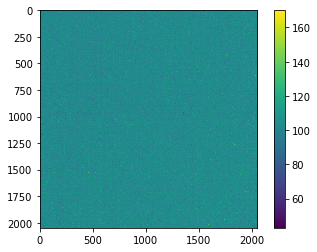

In [11]:
frame = cam0.get_frame(100)

gray = plt.imshow(frame)
plt.colorbar(gray)

# Center galvos 

In [12]:
import sys
sys.path.append('C:\\Users\\IFIc\\Projects\\laserlab\\scripts')

In [13]:
from galvo_python.galvos import *

In [15]:
serialport = open_serial_port()

In [16]:
center0 = [int(65534./2)+1100 ,int(65534./2)+5950]#calibrated on 29/01/2020
move_to_positionXY(serialport, [-2000,-9000], center=center0)

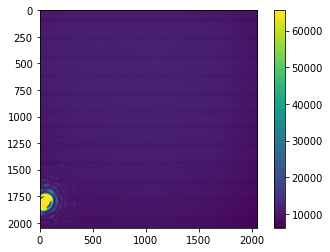

In [52]:
center0 = [int(65534./2)-300 ,int(65534./2)+5300]# cam upper left corner calibrated on 12/02/2020
move_to_positionXY(serialport, [0,0], center=center0)

frame = cam0.get_frame(100)

gray = plt.imshow(frame)
plt.colorbar(gray)

# Scan of the galvo 

In [59]:
from time import sleep

## Find minimum sleep between positions 

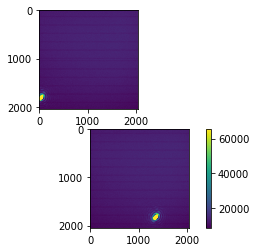

In [107]:
import numpy as np
center0 = [int(65534./2)-300 ,int(65534./2)+5300]# cam upper left corner calibrated on 12/02/2020
nap = np.arange(0.1, 1, 0.1)
fig, ax = plt.subplots(2)

move_to_positionXY(serialport, [0,0], center=center0, wait=0.0)
frame = cam0.get_frame(100)

move_to_positionXY(serialport, [1000,0], center=center0, wait=0)
sleep(1)
frame1 = cam0.get_frame(100)

gray = ax[0].imshow(frame)
gray1 = ax[1].imshow(frame1)
fig.colorbar(gray)
#sleep(2)
move_to_positionXY(serialport, [0,0], center=center0)
#fig.colorbar(gray1)

In [112]:
nap

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

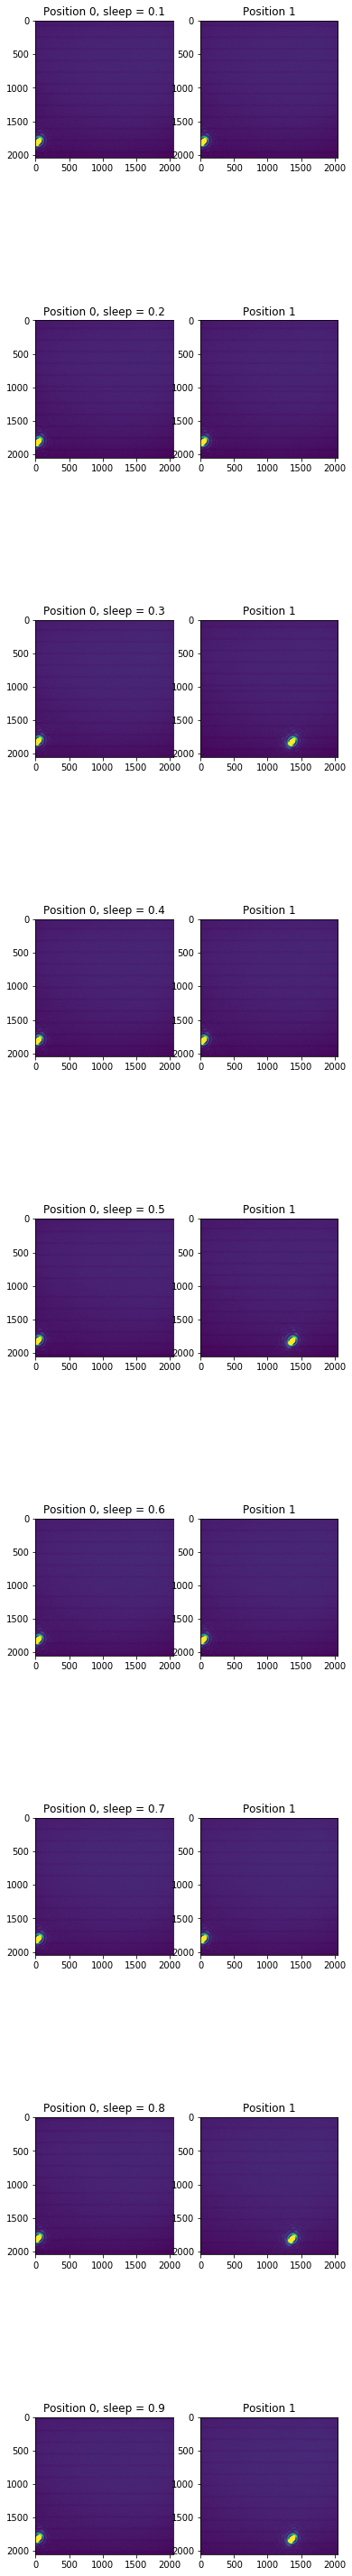

In [113]:
import numpy as np
center0 = [int(65534./2)-300 ,int(65534./2)+5300]# cam upper left corner calibrated on 12/02/2020
nap = np.arange(0.1, 1, 0.1)
fig, ax = plt.subplots(len(nap), 2, figsize=(6, 6*len(nap)))
for i, n in enumerate(nap):
    move_to_positionXY(serialport, [0,0], center=center0, wait=0.0)
    frame = cam0.get_frame(100)

    move_to_positionXY(serialport, [1000,0], center=center0, wait=0)
    sleep(n)
    frame1 = cam0.get_frame(100)
    
    gray = ax[i,0].imshow(frame)
    gray1 = ax[i,1].imshow(frame1)
    
    move_to_positionXY(serialport, [0,0], center=center0)
    ax[i,0].set_title('Position 0, sleep = %.1f' %n)
    ax[i,1].set_title('Position 1')
    sleep(2)
#fig.colorbar(gray1)

##### So the minimum is 0.5 s

## With this sleep time try scan in x 

In [122]:
xpos=range(0,2000,100)
ypos=range(-10000,10000,100)
ratio = 1
frames = []
#for y in ypos:
for x in xpos:
        move_to_positionXY(serialport, [int(x/ratio),int(0/ratio)], center=center0, wait=0.0)
        frames.append(cam0.get_frame(100))
        sleep(0.6)
move_to_positionXY(serialport, [0,0], center=center0)

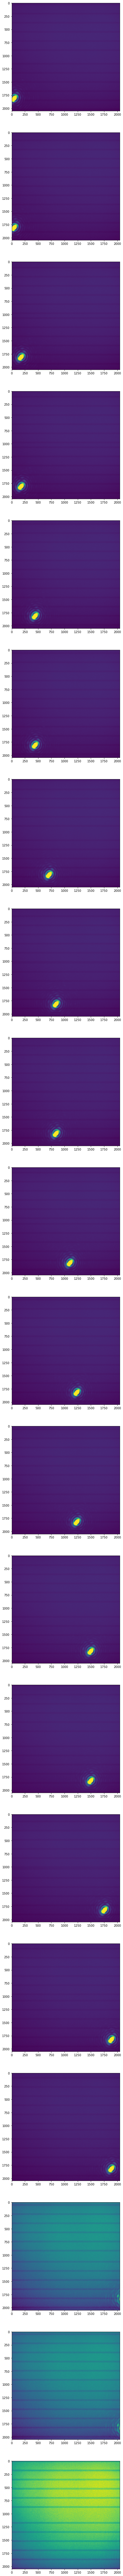

In [123]:
fig, ax = plt.subplots(len(xpos), figsize=(8, 8*len(frames)))
for i,f in enumerate(frames):
    ax[i].imshow(f)

## Now in y

In [124]:
xpos=range(0,2000,100)
ypos=range(0,1000,100)
ratio = 1
frames = []
for y in ypos:
#for x in xpos:
        move_to_positionXY(serialport, [int(0/ratio),int(y/ratio)], center=center0, wait=0.0)
        frames.append(cam0.get_frame(100))
        sleep(0.6)
move_to_positionXY(serialport, [0,0], center=center0)

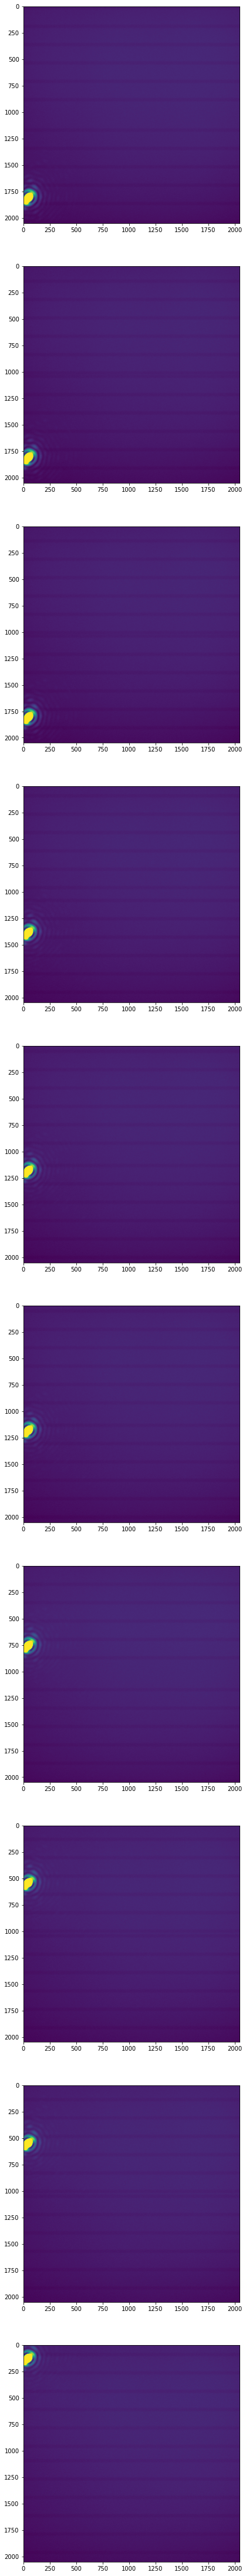

In [126]:
fig, ax = plt.subplots(len(ypos), figsize=(8, 8*len(frames)))
for i,f in enumerate(frames):
    ax[i].imshow(f)

# Other/issues

##### Debug .open() function 

In [9]:
cam.restart_lib()

In [54]:
from pylablib.aux_libs.devices.DCAM_lib import lib, DCAMLibError
lib.dcamapi_uninit()
#cam0.handle = 

In [48]:
lib.dcamdev_open(0)

DCAMLibError: function 'dcamdev_open' raised error -2147483130 (DCAMERR_NOCAMERA): no camera

In [34]:
cam.DCAMCamera(0).is_opened()

True